# 가설별로 EDA와 추론통계

### 1. Community Area 별 범죄 유형이 다르게 나타날 것이다.

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/최종데이터/최종데이터/chicago_crime_final.csv')

In [16]:
chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time'],
      dtype='object')

In [38]:
chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry', 'Community Area Name', 'F_Date', 'Time'],
      dtype='object')

In [19]:
chicago[['Community Area Name', 'Primary Type']].head()

,Community Area Name,Primary Type
0,Roseland,ROBBERY
1,Roseland,ROBBERY
2,West Pullman,ROBBERY
3,Jefferson Park,BURGLARY
4,Gage Park,OFFENSE INVOLVING CHILDREN


- 지역별 나타나는 범죄 유형 보기

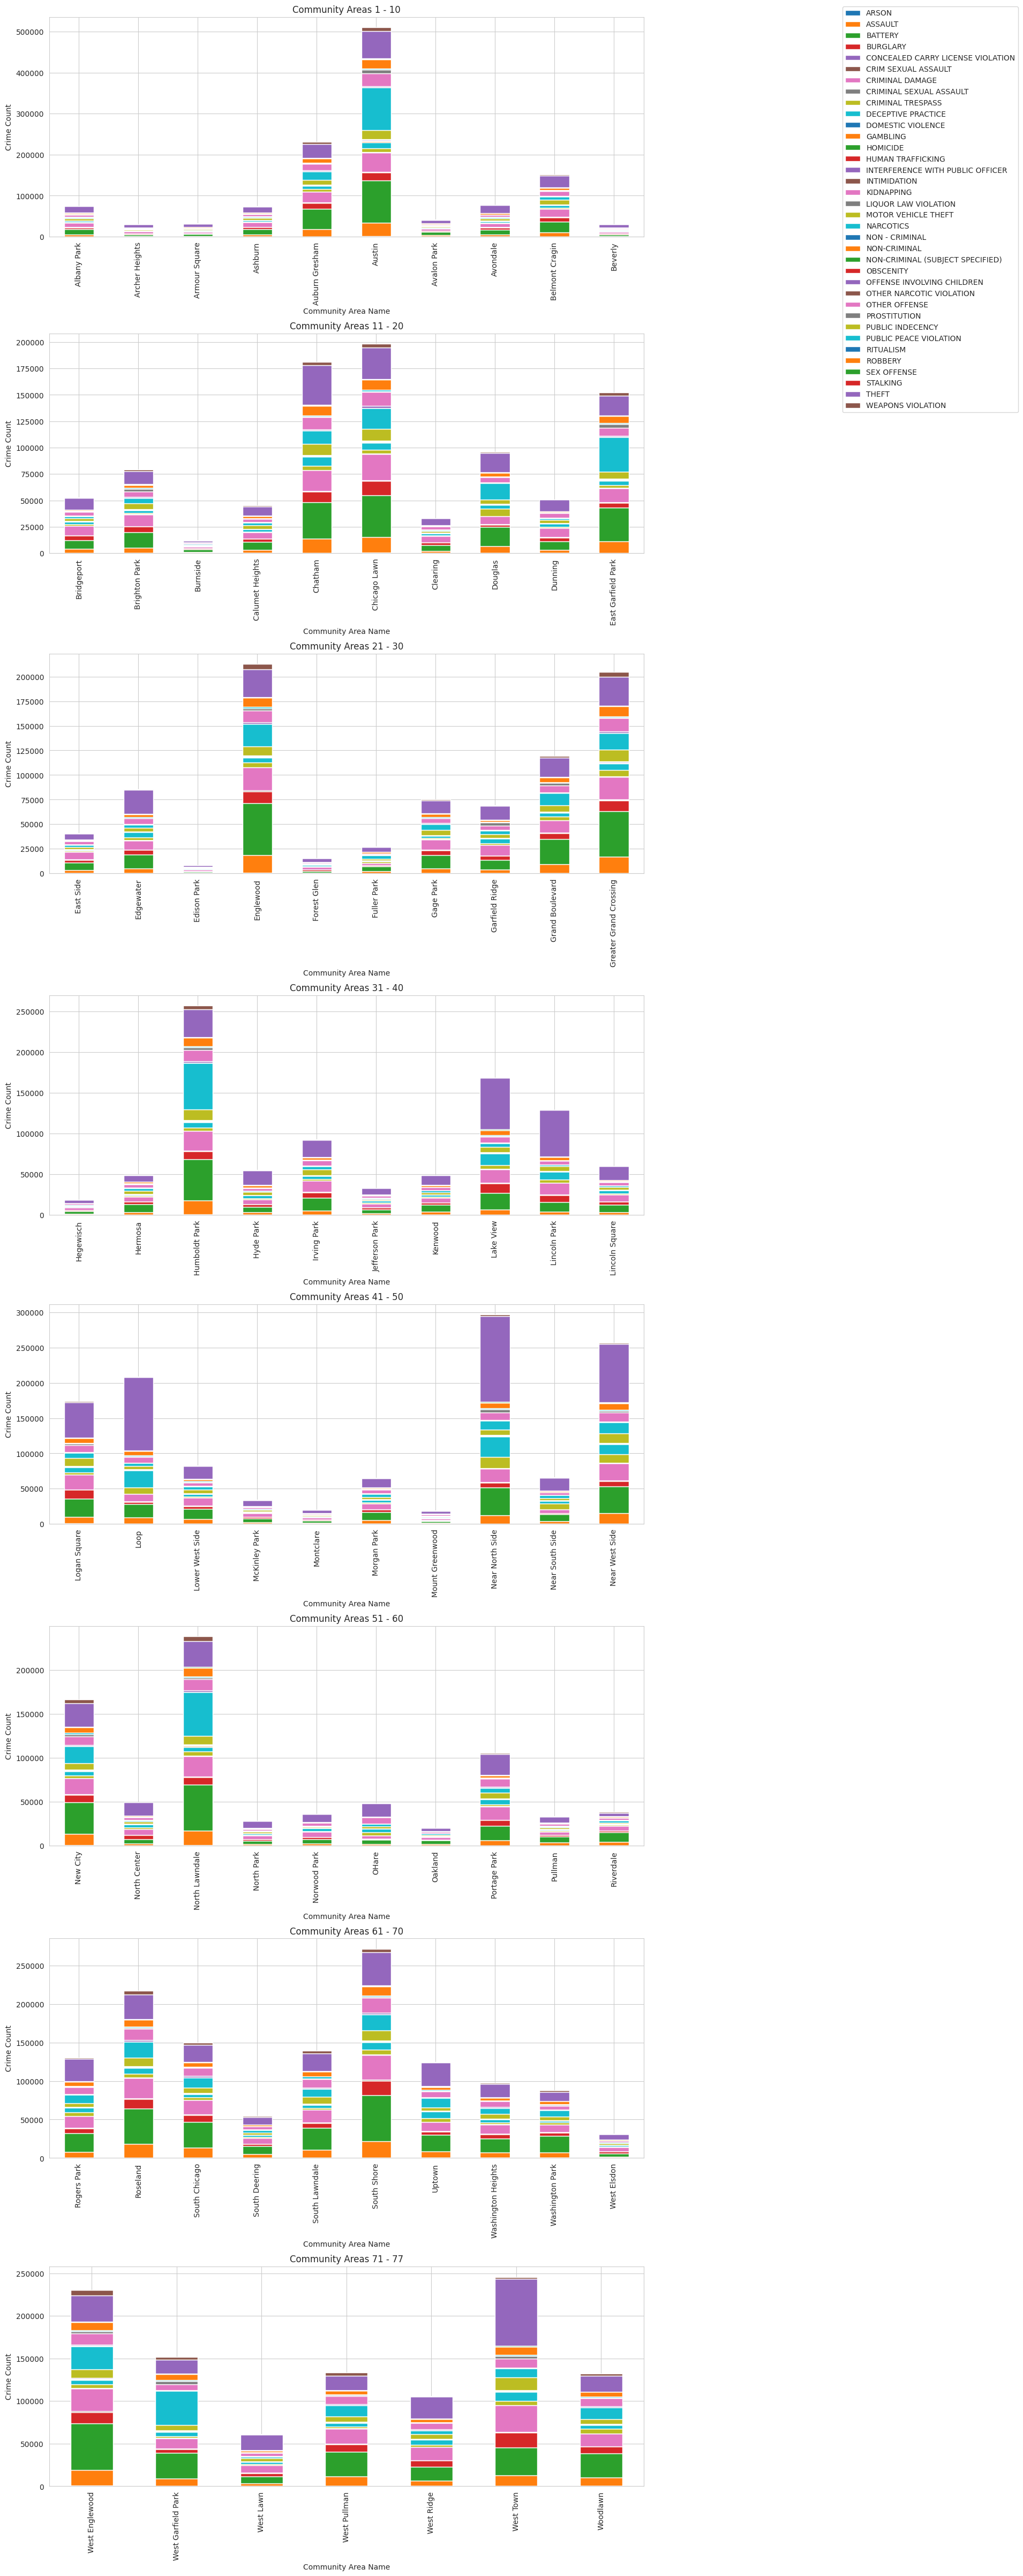

In [20]:
# 지역별 범죄 유형 데이터 생성
crime_by_region = chicago.groupby(['Community Area Name', 'Primary Type']).size().unstack()

# 지역을 10개씩 나누기
num_regions = len(crime_by_region)
regions_per_plot = 10
num_plots = (num_regions // regions_per_plot) + (1 if num_regions % regions_per_plot != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * regions_per_plot
    end = start + regions_per_plot
    ax = axes[i]

    crime_by_region.iloc[start:end].plot(kind='bar', stacked=True, ax=ax, legend=False)  # 개별 범례 제거
    ax.set_title(f'Community Areas {start + 1} - {min(end, num_regions)}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area Name')

# 모든 그래프에 대해 하나의 범례를 바깥쪽으로 통일
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.3, 1))  # 범례를 더 오른쪽으로 이동

plt.show()


- 지역별 나타나는 범죄 top3

<ipython-input-21-6b0b9343fe6c>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
<ipython-input-21-6b0b9343fe6c>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-21-6b0b9343fe6c>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-21-6b0b9343fe6c>:37: Us

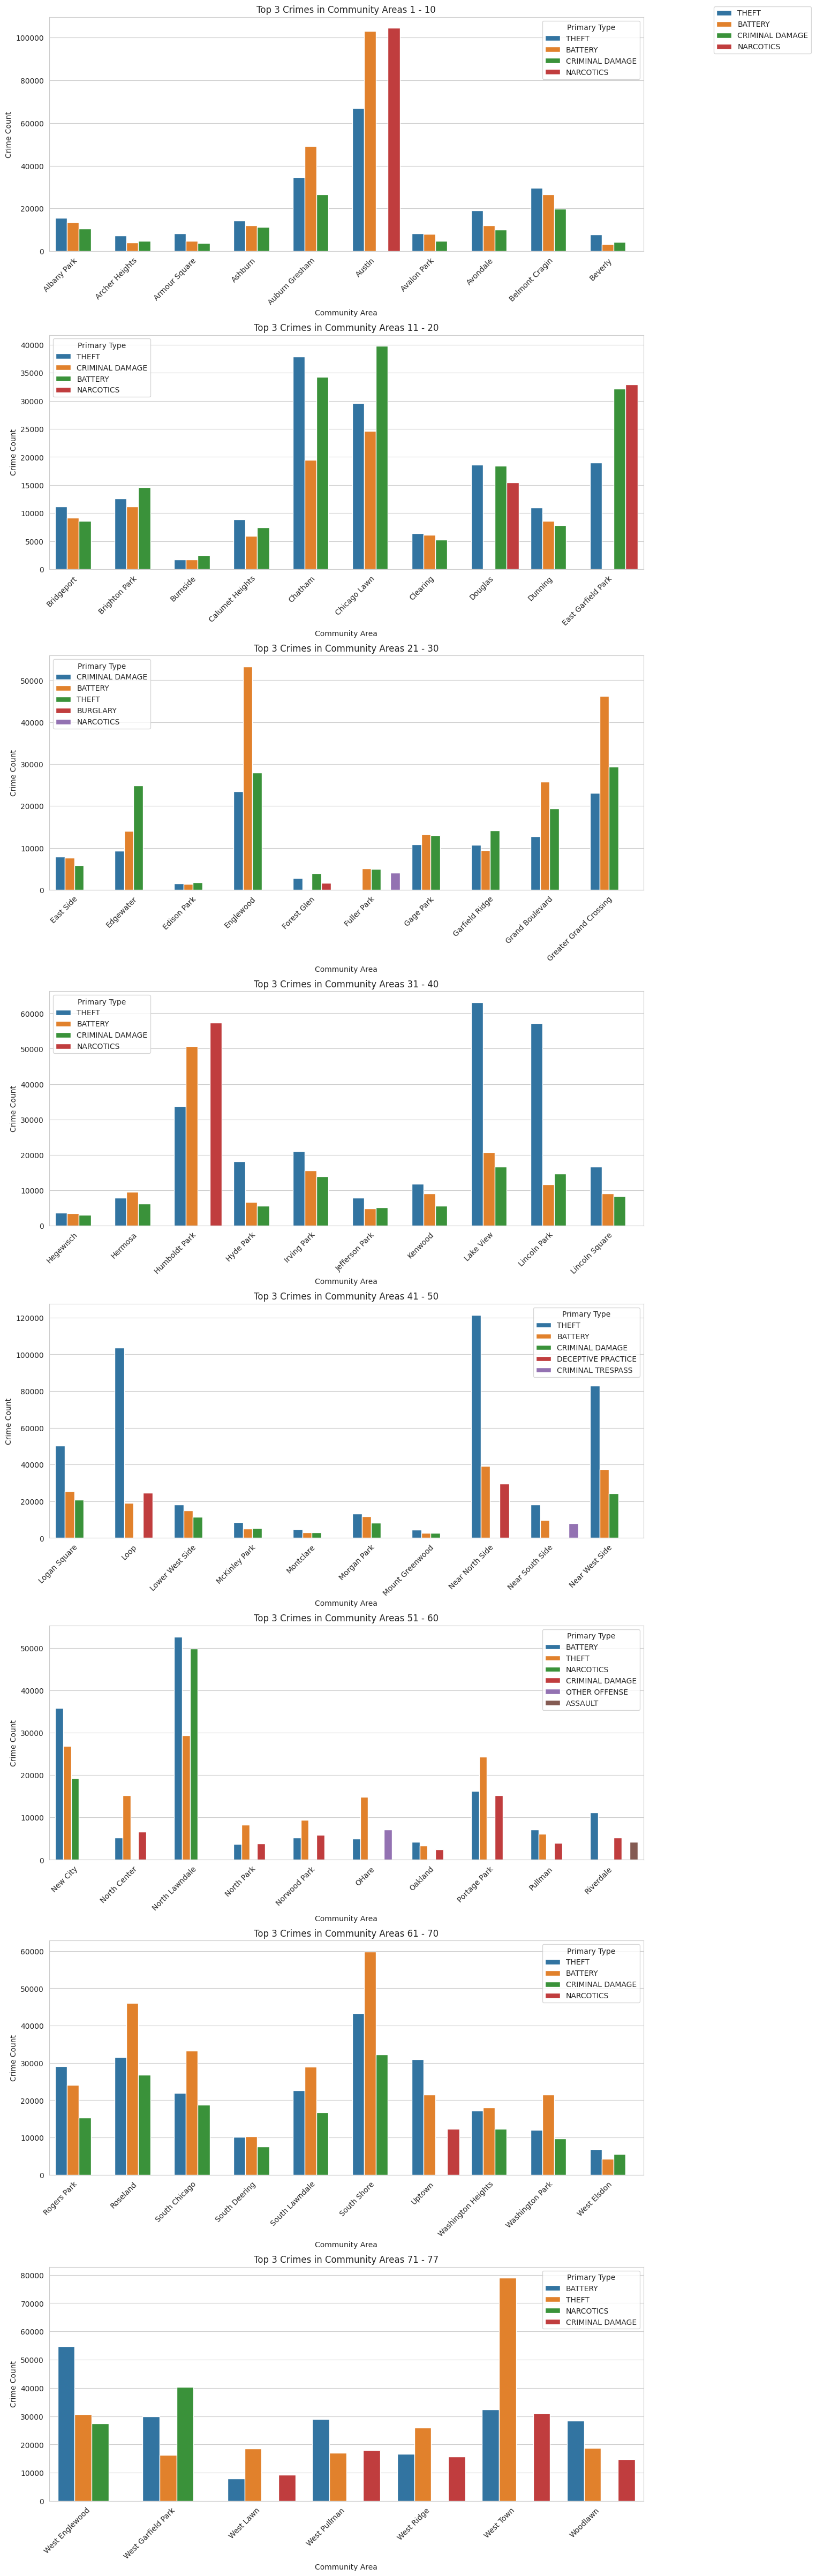

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 적용
sns.set_style("whitegrid")

# 지역별 범죄 유형 개수 계산
crime_counts = chicago.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 각 지역별 Top 3 범죄 유형 선택
top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- 큰 지역 (region) 별로 많이 일어나는 범죄 유형 top5

### 강력범죄는 어떻게 분포되어있을까?

<ipython-input-23-45ae5280bb81>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
<ipython-input-23-45ae5280bb81>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-23-45ae5280bb81>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-23-45ae5280bb81>:46: Us

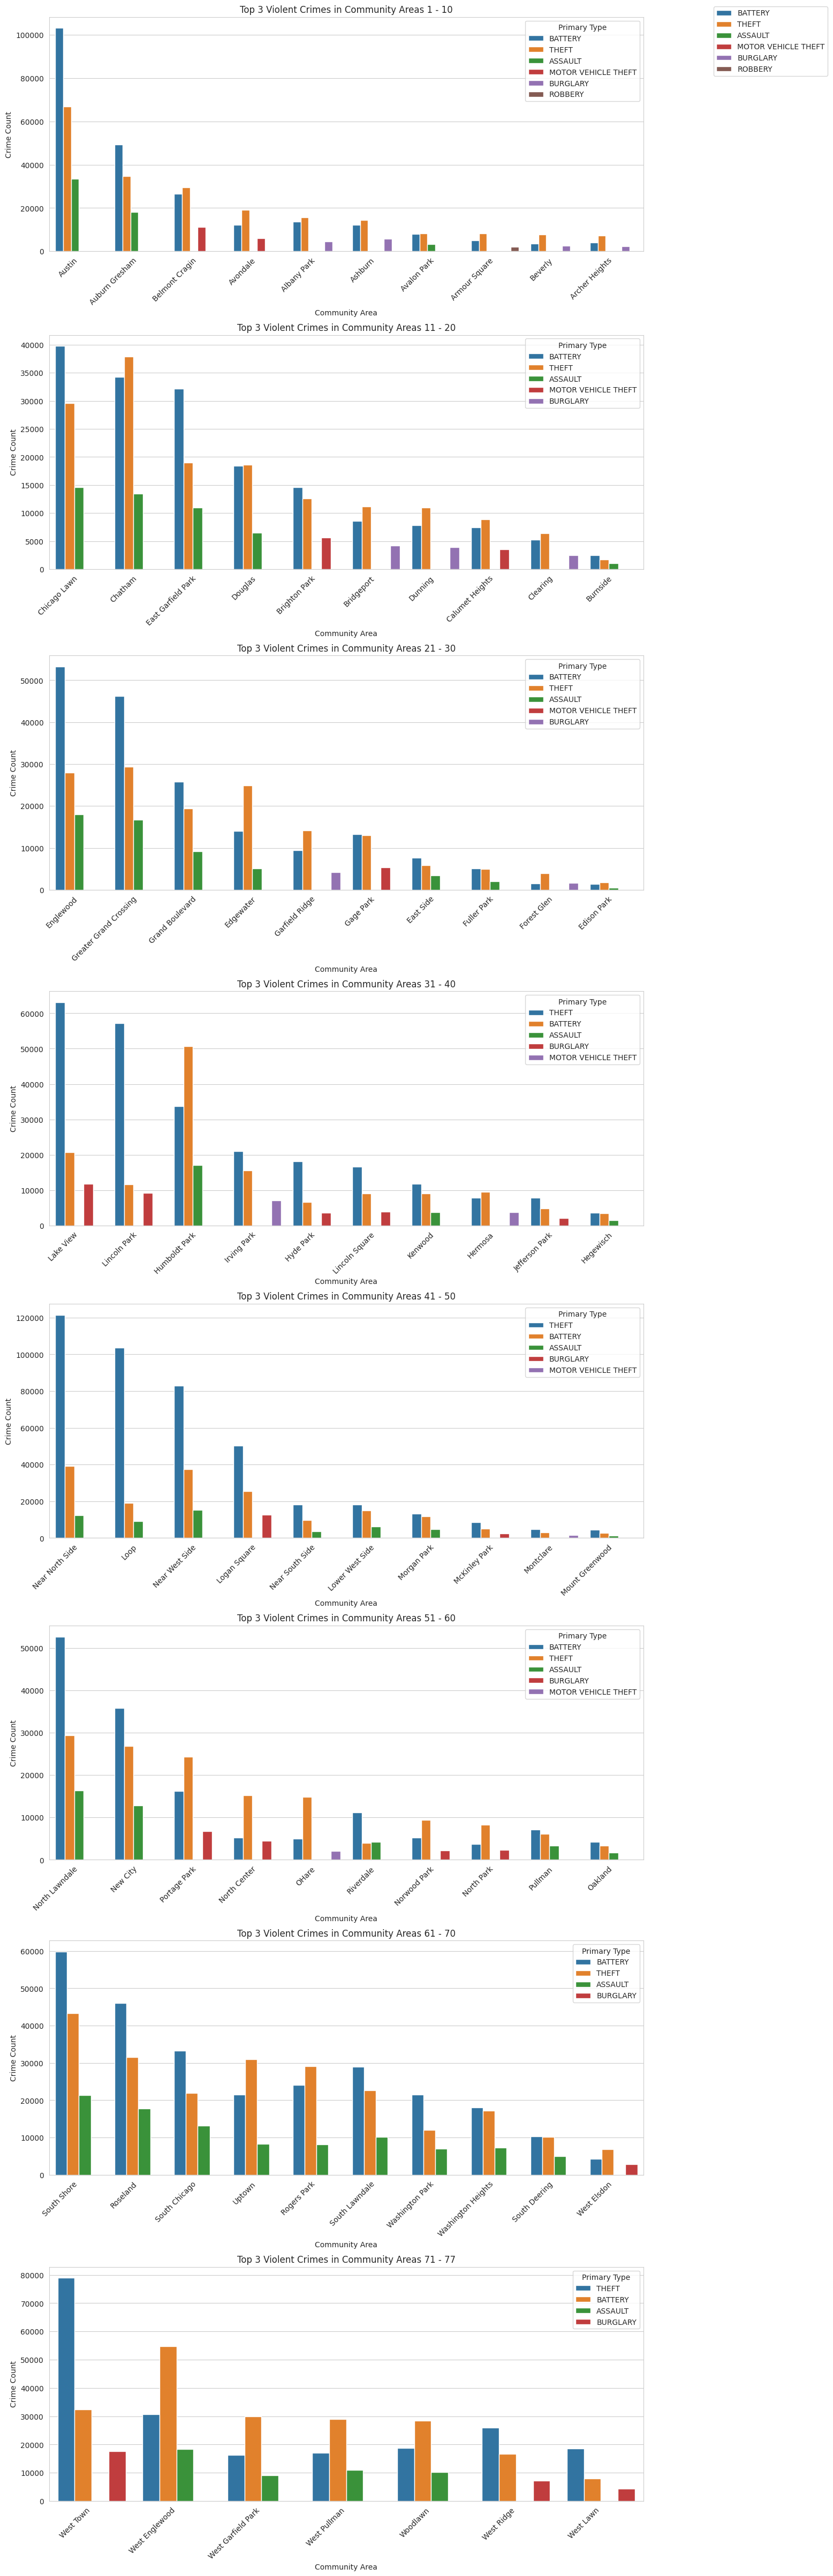

In [23]:
# Seaborn 스타일 적용
sns.set_style("whitegrid")

# 강력범죄 리스트 정의
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

# 강력범죄만 필터링
violent_crime_data = chicago[chicago['Primary Type'].isin(violent_crimes)]

# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 각 Community Area별 Top 3 강력범죄 선택
top3_crimes = crime_counts.groupby('Community Area Name').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 범죄 유형을 Count를 기준으로 내림차순 정렬
    subset = subset.sort_values(by='Count', ascending=False)

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Violent Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- 총 강력범죄건수 내림차순

<ipython-input-25-9dc7988871c0>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-25-9dc7988871c0>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-25-9dc7988871c0>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-25-9dc7988871c0>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-25-9dc7988871c0>:34: UserWarning: set_ticklabels() should

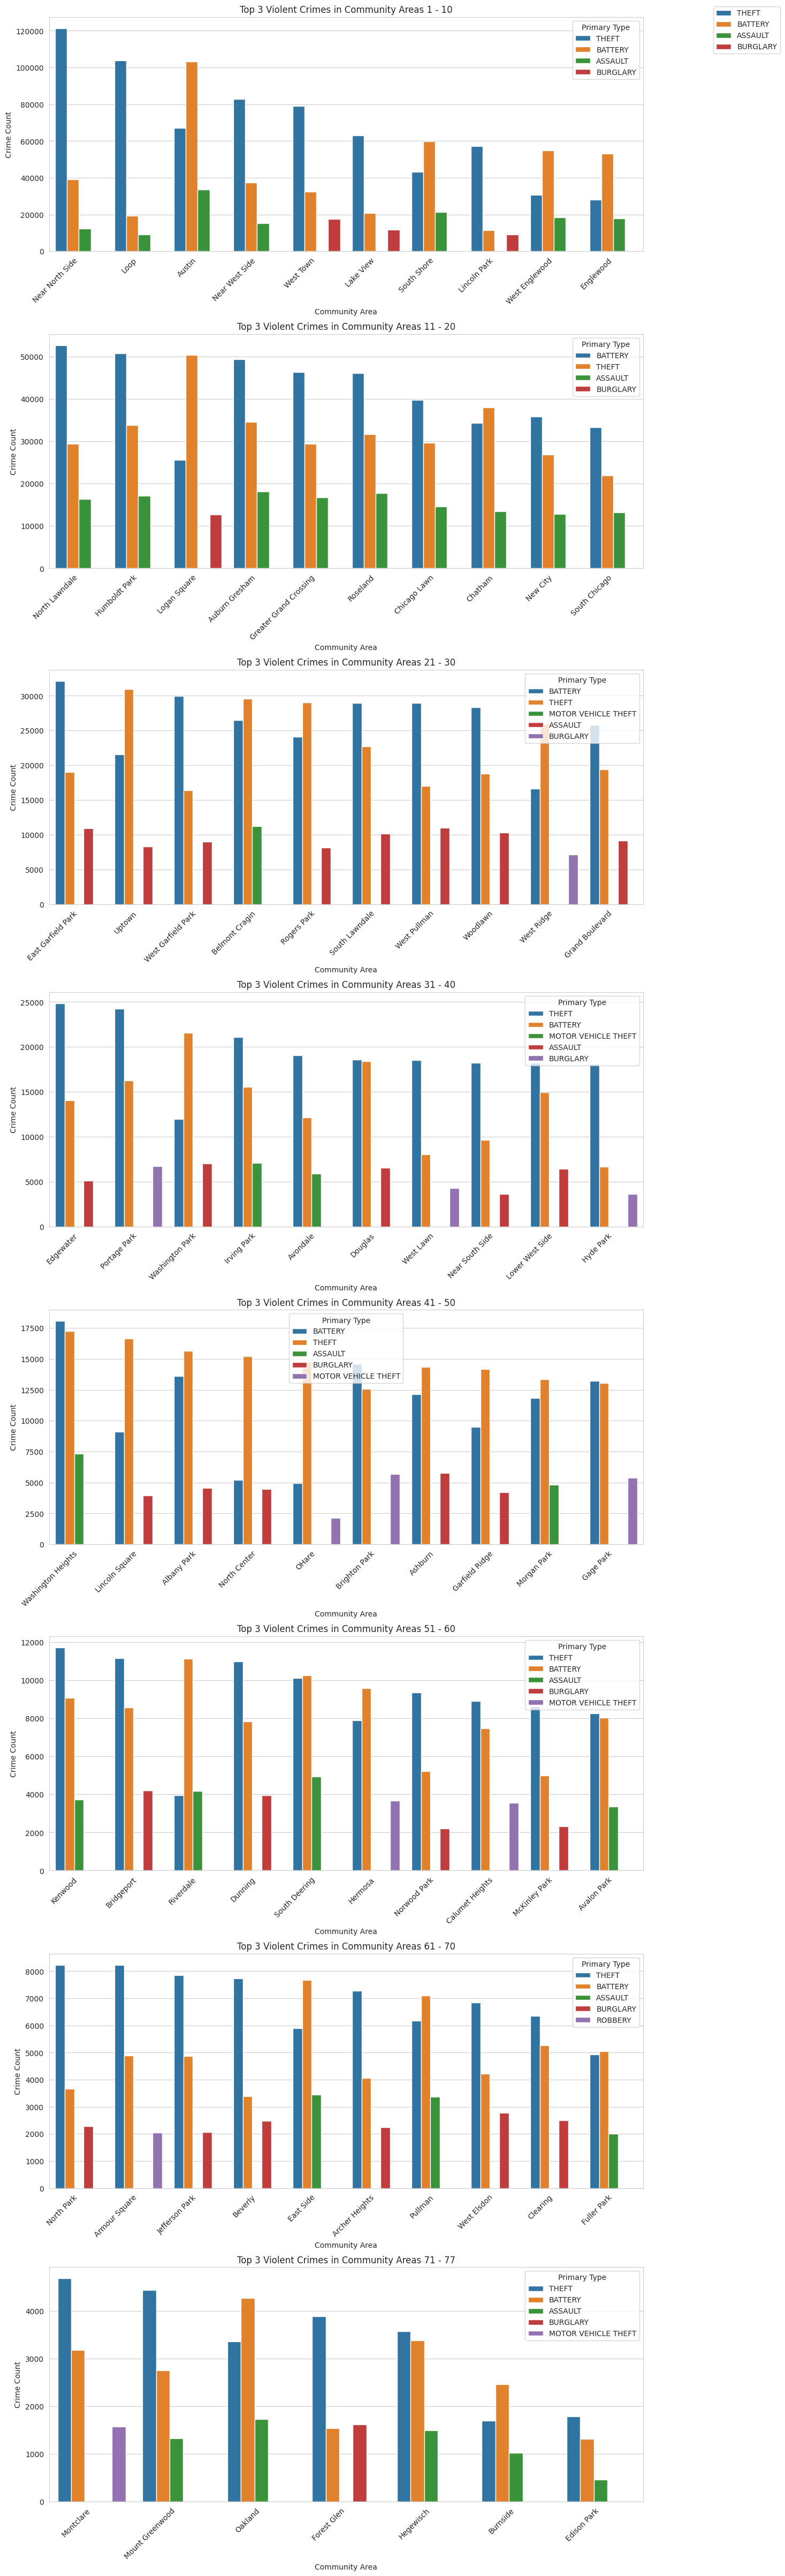

In [25]:
# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().reset_index(name='Count')

# 모든 Community Area를 기준으로 Count 기준 내림차순으로 정렬
crime_counts_sorted = crime_counts.sort_values(by='Count', ascending=False)

# 각 Community Area별 Top 3 강력범죄 선택
top3_crimes = crime_counts_sorted.groupby('Community Area Name').head(3).reset_index(drop=True)

# Community Area를 10개씩 묶기
community_areas = top3_crimes['Community Area Name'].unique()
num_plots = (len(community_areas) // 10) + (1 if len(community_areas) % 10 != 0 else 0)

# 그래프 그리기
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 6 * num_plots), constrained_layout=True)

if num_plots == 1:
    axes = [axes]  # 그래프가 하나일 경우 리스트로 변환

for i in range(num_plots):
    start = i * 10
    end = start + 10
    selected_areas = community_areas[start:end]

    ax = axes[i]
    subset = top3_crimes[top3_crimes['Community Area Name'].isin(selected_areas)]

    # 막대그래프 그리기
    sns.barplot(x='Community Area Name', y='Count', hue='Primary Type', data=subset, ax=ax)

    ax.set_title(f'Top 3 Violent Crimes in Community Areas {start + 1} - {min(end, len(community_areas))}')
    ax.set_ylabel('Crime Count')
    ax.set_xlabel('Community Area')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 범례를 그래프 바깥으로 이동
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.1, 1))

plt.show()


- Near North Side	THEFT 중심 → 유동인구 많고 상업지구
- Austin / West Englewood / Englewood	BATTERY, ASSAULT 집중 → 거주지역 내 폭력성 ↑
- South Shore / Chatham 등 남부 지역	BATTERY 비중 높고, ASSAULT도 많은 경우 많음
- Edgewater / Uptown	BURGLARY, MOTOR VEHICLE THEFT 다수 포함됨

- 강력 범죄의 총 건수가 많은 Community Area

<Figure size 1200x800 with 0 Axes>

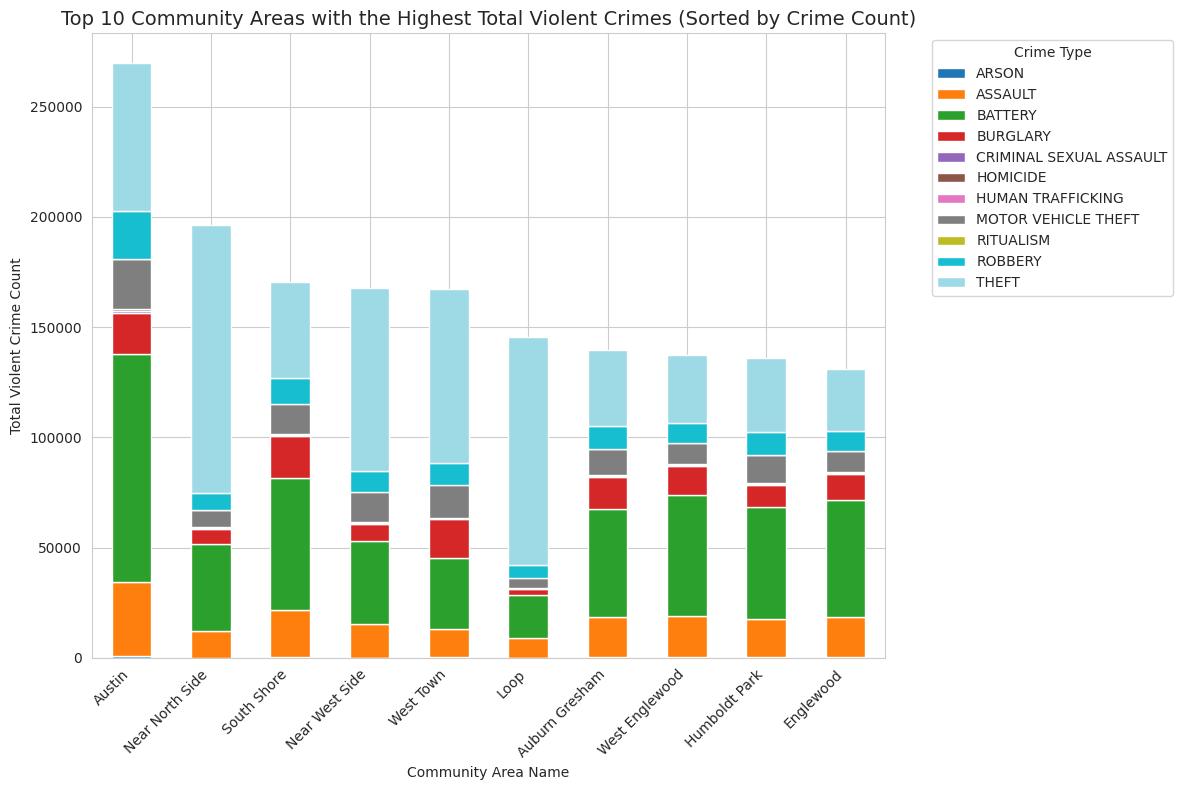

In [26]:
# Community Area별 범죄 유형 개수 계산
crime_counts = violent_crime_data.groupby(['Community Area Name', 'Primary Type']).size().unstack(fill_value=0)

# 각 Community Area별 강력범죄 총 건수 계산
total_crime_by_area = crime_counts.sum(axis=1).reset_index(name='Total Crimes')

# 총 건수를 기준으로 내림차순 정렬하고 Top 10 지역 선택
top10_violent_areas = total_crime_by_area.sort_values(by='Total Crimes', ascending=False).head(10)

# Top 10 지역에 대한 강력범죄 유형별 누적 데이터
top10_crime_data = crime_counts.loc[top10_violent_areas['Community Area Name']]

# 각 지역별로 강력범죄 유형을 건수 기준으로 내림차순 정렬
top10_crime_data_sorted = top10_crime_data.apply(lambda row: row.sort_values(ascending=False), axis=1)

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 누적 그래프 그리기 (각 강력범죄 유형을 컬럼으로 사용)
top10_crime_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

# 그래프 설정
plt.title('Top 10 Community Areas with the Highest Total Violent Crimes (Sorted by Crime Count)', fontsize=14)
plt.xlabel('Community Area Name')
plt.ylabel('Total Violent Crime Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

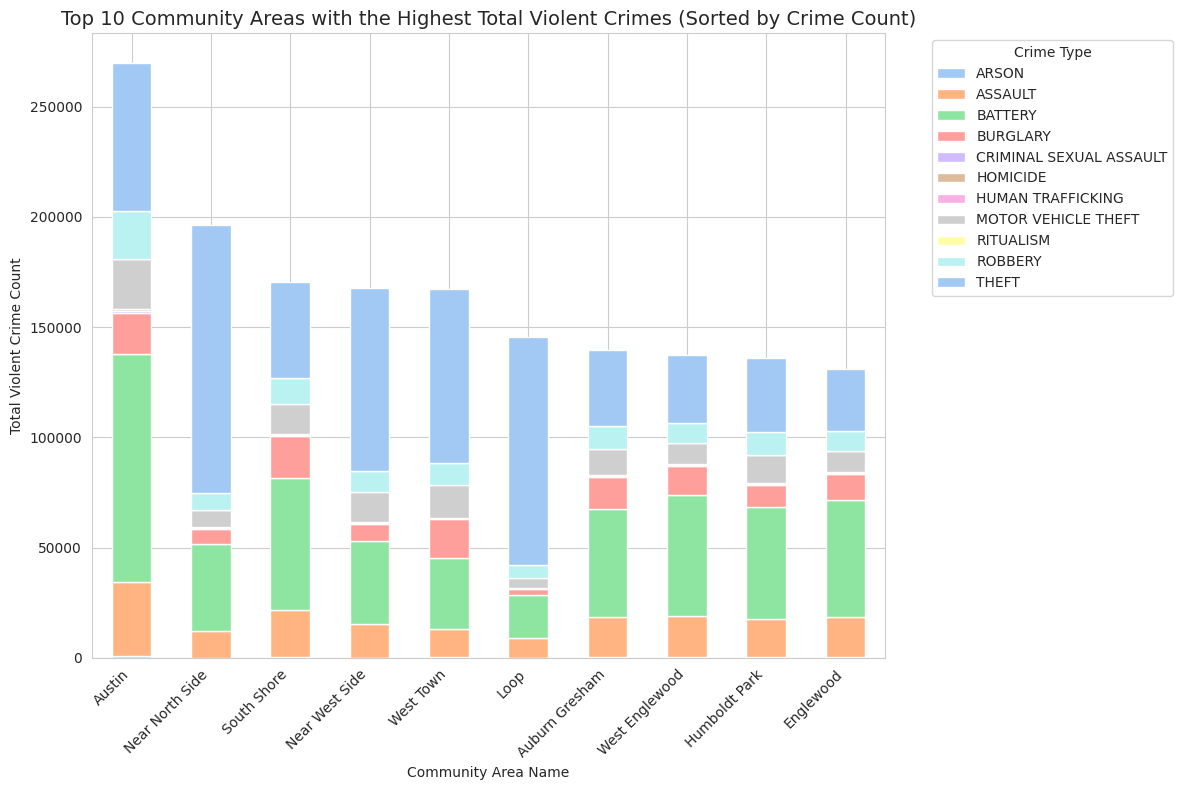

In [37]:
# 파스텔 색상 12개 생성
pastel_colors = sns.color_palette("pastel", n_colors=12)

# 누적 막대그래프 그릴 때 color=... 으로 전달
top10_crime_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), color=pastel_colors)

plt.title('Top 10 Community Areas with the Highest Total Violent Crimes (Sorted by Crime Count)', fontsize=14)
plt.xlabel('Community Area Name')
plt.ylabel('Total Violent Crime Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- Austin	BATTERY (폭행) 압도적, ASSAULT도 많음 → 폭력 중심
- Near North Side / Loop / West Town	THEFT(절도) 비중 압도적 → 상업·관광 지역
- South Shore / Englewood / Auburn Gresham	BATTERY + ROBBERY 구성 강함 → 주거지 기반 범죄
- Humboldt Park	MOTOR VEHICLE THEFT + BURGLARY 비중도 큼

강력범죄가 많이 발생하는 지역 top 10의 시간대별 강력범죄 건수 흐름<br>

In [27]:
top10_crime_data

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIMINAL SEXUAL ASSAULT,HOMICIDE,HUMAN TRAFFICKING,MOTOR VEHICLE THEFT,RITUALISM,ROBBERY,THEFT
Community Area Name,,,,,,,,,,,
Austin,982,33525,103160,18855,608,1146,11,22485,2,21924,66993
Near North Side,99,12289,39059,6846,775,144,5,7799,2,7870,121419
South Shore,365,21359,59784,19106,389,567,2,13481,0,11848,43326
Near West Side,177,15256,37454,7957,370,279,8,13928,0,9104,82959
West Town,405,12605,32486,17666,237,202,2,14943,0,9669,78902
Loop,77,9172,19187,3021,271,44,3,4426,0,5739,103698
Auburn Gresham,368,18079,49269,14472,226,482,6,11917,1,10217,34590
West Englewood,546,18446,54816,13225,219,550,8,9634,1,9140,30753
Humboldt Park,613,17108,50642,10199,250,571,3,12649,1,10276,33773


In [30]:
violent_crime_data['Time'] = pd.to_datetime(violent_crime_data['Time'], format='%H:%M', errors='coerce')

violent_crime_data['Hour'] = violent_crime_data['Time'].dt.hour

<ipython-input-30-f1724f56260f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime_data['Time'] = pd.to_datetime(violent_crime_data['Time'], format='%H:%M', errors='coerce')
<ipython-input-30-f1724f56260f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime_data['Hour'] = violent_crime_data['Time'].dt.hour
